<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

**Целевой признак**

Exited — факт ухода клиента

## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy.random import choice
data = pd.read_csv('/datasets/Churn.csv')



data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [ ]:
data.columns = data.columns.str.lower()
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
data.shape

(10000, 14)

In [ ]:
data['tenure'].value_counts(dropna=False) 

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [ ]:
datat=data['tenure']

In [ ]:
tenure=data['tenure'].value_counts(normalize=True)

In [ ]:
data['tenure']=data['tenure'].fillna(0)
data['tenure'].value_counts(dropna=False)

0.0     1291
1.0      952
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
Name: tenure, dtype: int64

In [ ]:
data = data.drop(['rownumber','customerid','surname'], axis=1)
data.shape

(10000, 11)

In [ ]:
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


<div class="alert alert-info", style="border:solid dark-blue 3px; padding: 20px">
<font size="4", color = "Light-Blue"><b>🎯 Комментарий </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  Данные выгружены, что можно заметить: 
        
        
* названия столбцов пперевели к нижнему регистру     
* В колонке data['tenure'] есть NaN, данная колонка обозначает( Tenure — сколько лет человек является клиентом банка).Следовательно, данные клиента были утерены,либо это новенькие.Их можно заменить на ноль.
*Также удалила колонки['rownumber','customerid','surname'] в данном задании они не нужны.Так как не играют важную роль в том, что останется клиент в банке, либо нет.
*Создала датафрейм, созданный по методу прямого кодирования с защитой от дамми-ловушки.
        

## Исследование задачи

In [ ]:
target = data_ohe['exited']
features = data_ohe.drop(['exited'] , axis=1)
RANDOM_STATE = 20052020
features_train,features_valid,target_train,target_valid =  train_test_split(features,target, test_size=0.4, random_state=RANDOM_STATE,stratify=target)
features_test, features_valid,target_test,target_valid =  train_test_split(features_valid,target_valid, test_size=0.5, random_state=RANDOM_STATE,stratify=target_valid)

In [ ]:
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


0    0.7963
1    0.2037
Name: exited, dtype: float64


<AxesSubplot:>

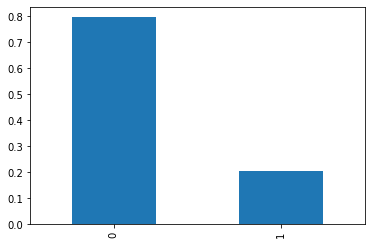

In [ ]:
class_target=target.value_counts(normalize=True)
print(class_target)

class_target.plot(kind='bar')


In [ ]:

ss = StandardScaler()
features_train_scaled = ss.fit_transform(features_train)
features_test_scaled = ss.transform(features_test)
features_valid_scaled = ss.transform(features_valid)

#target_train = np.array(target_train)


<div class="alert alert-info", style="border:solid dark-blue 3px; padding: 20px">
<font size="4", color = "Light-Blue"><b>🎯 Комментарий </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
Как видно из графика присутствует сильный дисбаланс классов.
        

In [ ]:
#chek

df1 = pd.DataFrame()



In [ ]:
%%time

#Решающее дерево
best_depth = 0
best_F1_score = 0
for depth in range(2, 60):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth)
    model.fit(features_train_scaled, target_train)
    predicted_valid = model.predict(features_valid_scaled)
    F1_score = f1_score(target_valid, predicted_valid)
    print('Max depth', depth,'F1-score', F1_score)
    if F1_score > best_F1_score:
        best_depth = depth
        best_F1_score=F1_score

print('Лучшая глубина дерева', best_depth,'Лучшая F1-score', best_F1_score)


Max depth 2 F1-score 0.5139664804469274
Max depth 3 F1-score 0.34563106796116505
Max depth 4 F1-score 0.5039619651347068
Max depth 5 F1-score 0.5109717868338558
Max depth 6 F1-score 0.5351681957186544
Max depth 7 F1-score 0.5319148936170214
Max depth 8 F1-score 0.5195195195195196
Max depth 9 F1-score 0.5069551777434312
Max depth 10 F1-score 0.5036603221083455
Max depth 11 F1-score 0.5014164305949008
Max depth 12 F1-score 0.5067750677506775
Max depth 13 F1-score 0.49322493224932246
Max depth 14 F1-score 0.46814044213263983
Max depth 15 F1-score 0.45838668373879643
Max depth 16 F1-score 0.4577114427860697
Max depth 17 F1-score 0.4772447724477245
Max depth 18 F1-score 0.4841075794621027
Max depth 19 F1-score 0.48143712574850295
Max depth 20 F1-score 0.47721822541966424
Max depth 21 F1-score 0.48210023866348445
Max depth 22 F1-score 0.48134777376654636
Max depth 23 F1-score 0.4693140794223827
Max depth 24 F1-score 0.4693140794223827
Max depth 25 F1-score 0.4693140794223827
Max depth 26 F1-

<div class="alert alert-info", style="border:solid dark-blue 3px; padding: 20px">
<font size="4", color = "Light-Blue"><b>🎯 Комментарий </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
У решающего дерева Лучшая глубина дерева 7 Лучшая F1-score 0.5857142857142857
        

<div class="alert alert-info", style="border:solid dark-blue 3px; padding: 20px">
<font size="4", color = "Light-Blue"><b>🎯 Комментарий c новым масштабированием  </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
Лучшая глубина дерева 6 Лучшая F1-score 0.5351681957186544. У меня тутже уменьшелись показатели 
        

In [ ]:
%%time

best_est = 0
best_F1_score= 0
best_depth_rf=0


for est in range(1, 100,2):
    for depth in range(2, 23, 2):
    
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est,max_depth = depth)
        model.fit(features_train_scaled,target_train)
        predicted_valid = model.predict(features_valid_scaled) 
        F1_score = f1_score(target_valid, predicted_valid)
        print('Количество деревьев', est,'F1-score', F1_score)
        if  F1_score > best_F1_score:
            best_F1_score=F1_score
            best_est = est
            best_depth_rf = depth
print('Лучшее количество деревьев', best_est,'Лучшая F1-score', best_F1_score,'Выcота',best_depth_rf)


Количество деревьев 1 F1-score 0.014634146341463415
Количество деревьев 1 F1-score 0.4747774480712166
Количество деревьев 1 F1-score 0.4482225656877898
Количество деревьев 1 F1-score 0.45337159253945475
Количество деревьев 1 F1-score 0.5043227665706052
Количество деревьев 1 F1-score 0.48787446504992865
Количество деревьев 1 F1-score 0.4725274725274725
Количество деревьев 1 F1-score 0.4337957124842371
Количество деревьев 1 F1-score 0.44892812105926855
Количество деревьев 1 F1-score 0.45657568238213403
Количество деревьев 1 F1-score 0.4247572815533981
Количество деревьев 3 F1-score 0.11136890951276102
Количество деревьев 3 F1-score 0.46589018302828616
Количество деревьев 3 F1-score 0.4727891156462585
Количество деревьев 3 F1-score 0.47751937984496123
Количество деревьев 3 F1-score 0.5365853658536586
Количество деревьев 3 F1-score 0.502906976744186
Количество деревьев 3 F1-score 0.49002849002849
Количество деревьев 3 F1-score 0.4888888888888889
Количество деревьев 3 F1-score 0.49723756906

<div class="alert alert-info", style="border:solid dark-blue 3px; padding: 20px">
<font size="4", color = "Light-Blue"><b>🎯 Комментарий </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
У случайного леса :Лучшее количество деревьев 99 Лучшая F1-score 0.6027397260273973 Выcота 14
        

<div class="alert alert-info", style="border:solid dark-blue 3px; padding: 20px">
<font size="4", color = "Light-Blue"><b>🎯 Комментарий c новым масштабированием  </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
Лучшее количество деревьев 35 Лучшая F1-score 0.5718654434250764 Выcота 14

In [ ]:
%%time

model =  LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict(features_valid_scaled)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.3345323741007194
CPU times: user 46.5 ms, sys: 55.8 ms, total: 102 ms
Wall time: 77.7 ms


<div class="alert alert-info", style="border:solid dark-blue 3px; padding: 20px">
<font size="4", color = "Light-Blue"><b>🎯 Комментарий </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
Результаты довольно низкие. Возможно precision или recall низкий и близок к 0.

In [ ]:
%%time

model = DecisionTreeClassifier(random_state=RANDOM_STATE , max_depth=7)
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict(features_valid_scaled)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=99,max_depth = 14)
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict(features_valid_scaled)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict(features_valid_scaled)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))

Решающее дерево
Точность попадания по классам 0.846
Precision 0.6972111553784861
Recall 0.42997542997543
F1 0.5319148936170214

Случайный лес
Точность попадания по классам 0.854
Precision 0.7366255144032922
Recall 0.4398034398034398
F1 0.5507692307692308

Логистическая регрессия
Точность попадания по классам 0.815
Precision 0.6241610738255033
Recall 0.2285012285012285
F1 0.3345323741007194
CPU times: user 834 ms, sys: 79.7 ms, total: 914 ms
Wall time: 888 ms


AUC-ROC DecisionTreeClassifier 0.804477821426974
AUC-ROC RandomForestClassifier 0.8401321197931368
AUC-ROC LogisticRegression 0.755308467172874


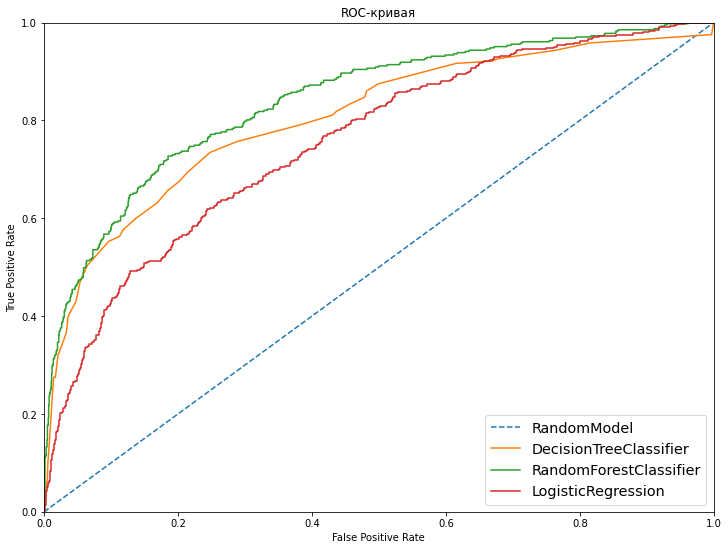

In [ ]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')



model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=7)
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = predicted_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=99,max_depth = 14)
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = predicted_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model.fit(features_train_scaled, target_train)
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

<div class="alert alert-info", style="border:solid dark-blue 3px; padding: 20px">
<font size="4", color = "Light-Blue"><b>🎯 Комментарий </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
По графику видно, что метрика AUC-ROC выше у случайного леса

## Борьба с дисбалансом

In [ ]:
#Изучим возможности моделей по взвешиванию классов.




model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=7,class_weight='balanced')
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict(features_valid_scaled)
predicted_valid_auc = model.predict_proba(features_valid_scaled)
probabilities_one_valid = predicted_valid_auc [:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC', auc_roc)
print()

model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=99,max_depth = 14,class_weight='balanced')
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict(features_valid_scaled)
predicted_valid_auc = model.predict_proba(features_valid_scaled)
probabilities_one_valid = predicted_valid_auc [:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC', auc_roc)
print()

model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear',class_weight='balanced')
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict(features_valid_scaled)
predicted_valid_auc = model.predict_proba(features_valid_scaled)
probabilities_one_valid = predicted_valid_auc [:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC', auc_roc)

Решающее дерево
Точность попадания по классам 0.7155
Precision 0.3953488372093023
Recall 0.7518427518427518
F1 0.5182049110922946
AUC-ROC 0.7932855814211747

Случайный лес
Точность попадания по классам 0.8415
Precision 0.65
Recall 0.47911547911547914
F1 0.5516265912305516
AUC-ROC 0.833901698308478

Логистическая регрессия
Точность попадания по классам 0.696
Precision 0.36473755047106327
Recall 0.6658476658476659
F1 0.471304347826087
AUC-ROC 0.7610275915360661


<div class="alert alert-info", style="border:solid dark-blue 3px; padding: 20px">
<font size="4", color = "Light-Blue"><b>🎯 Комментарий </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
Метрика F1  упала незначительно у решающего дерева и у случайного леса.Но возрасла логистической регресии

In [ ]:
#Увеличение выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

1    4888
0    4778
Name: exited, dtype: int64


In [ ]:
%%time


model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=7)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
predicted_valid_auc = model.predict_proba(features_valid_scaled)
probabilities_one_valid = predicted_valid_auc [:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC', auc_roc)
print()

model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=99,max_depth = 14)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
predicted_valid_auc = model.predict_proba(features_valid_scaled)
probabilities_one_valid = predicted_valid_auc [:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC', auc_roc)
print()

model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
predicted_valid_auc = model.predict_proba(features_valid_scaled)
probabilities_one_valid = predicted_valid_auc [:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC', auc_roc)

Решающее дерево
Точность попадания по классам 0.716
Precision 0.3961290322580645
Recall 0.7542997542997543
F1 0.5194585448392555
AUC-ROC 0.4826883894680505

Случайный лес
Точность попадания по классам 0.835
Precision 0.5955334987593052
Recall 0.5896805896805897
F1 0.5925925925925927
AUC-ROC 0.4432529602021127

Логистическая регрессия
Точность попадания по классам 0.651
Precision 0.3265792610250298
Recall 0.6732186732186732
F1 0.43980738362760835
AUC-ROC 0.7558051117373152
CPU times: user 1.19 s, sys: 60.1 ms, total: 1.25 s
Wall time: 1.27 s


<div class="alert alert-info", style="border:solid dark-blue 3px; padding: 20px">
<font size="4", color = "Light-Blue"><b>🎯 Комментарий </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
При увеличении выборки F1 тут же повысилась у случайного леса.

In [ ]:
#Уменьшение выборки

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=20052020)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=20052020)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

1    1222
0    1194
Name: exited, dtype: int64


In [ ]:
%%time


model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=7)
model.fit(features_downsampled, target_downsampled )
predicted_valid = model.predict(features_valid)
predicted_valid_auc = model.predict_proba(features_valid_scaled)
probabilities_one_valid = predicted_valid_auc [:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC', auc_roc)
print()

model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=99,max_depth = 14)
model.fit(features_downsampled, target_downsampled )
predicted_valid = model.predict(features_valid)
predicted_valid_auc = model.predict_proba(features_valid_scaled)
probabilities_one_valid = predicted_valid_auc [:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC', auc_roc)
print()

model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model.fit(features_downsampled, target_downsampled )
predicted_valid = model.predict(features_valid)
predicted_valid_auc = model.predict_proba(features_valid_scaled)
probabilities_one_valid = predicted_valid_auc [:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC', auc_roc)

Решающее дерево
Точность попадания по классам 0.737
Precision 0.41838134430727025
Recall 0.7493857493857494
F1 0.5369718309859156
AUC-ROC 0.46803968837867144

Случайный лес
Точность попадания по классам 0.7585
Precision 0.4431137724550898
Recall 0.7272727272727273
F1 0.5506976744186047
AUC-ROC 0.4928580352309166

Логистическая регрессия
Точность попадания по классам 0.6485
Precision 0.32790697674418606
Recall 0.6928746928746928
F1 0.4451460142067877
AUC-ROC 0.7618589313504568
CPU times: user 517 ms, sys: 91.8 ms, total: 609 ms
Wall time: 561 ms


<div class="alert alert-info", style="border:solid dark-blue 3px; padding: 20px">
<font size="4", color = "Light-Blue"><b>🎯 Комментарий </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
При уменьшении выборки F1 упала 

AUC-ROC DecisionTreeClassifier 0.7954850073494142
AUC-ROC RandomForestClassifier 0.8381270330422874
AUC-ROC LogisticRegression 0.7127204245848313


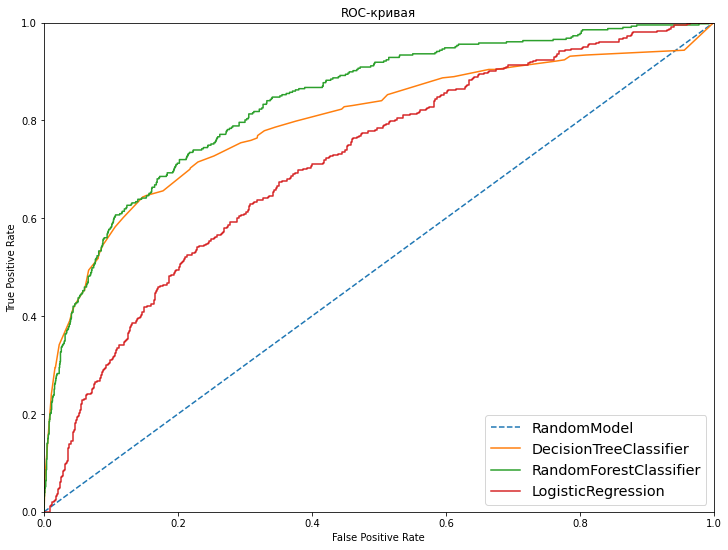

In [ ]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=7)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict_proba(features_valid)
probabilities_one_valid = predicted_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=99,max_depth = 14)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict_proba(features_valid)
probabilities_one_valid = predicted_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

<div class="alert alert-info", style="border:solid dark-blue 3px; padding: 20px">
<font size="4", color = "Light-Blue"><b>🎯 Комментарий </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
Когда устранили дисбаланс по увеличенной выборки,метрика AUC-ROC показывает лучший результат именно у случайнного леса, это подтверждает и график

## Тестирование модели

In [ ]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=99,max_depth = 14)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_valid, predicted_test))
print('F1', f1_score(target_test, predicted_test))

Случайный лес
Точность попадания по классам 0.848
Precision 0.6375661375661376
Recall 0.1769041769041769
F1 0.6132315521628499


AUC-ROC RandomForestClassifier  0.8523037984037836


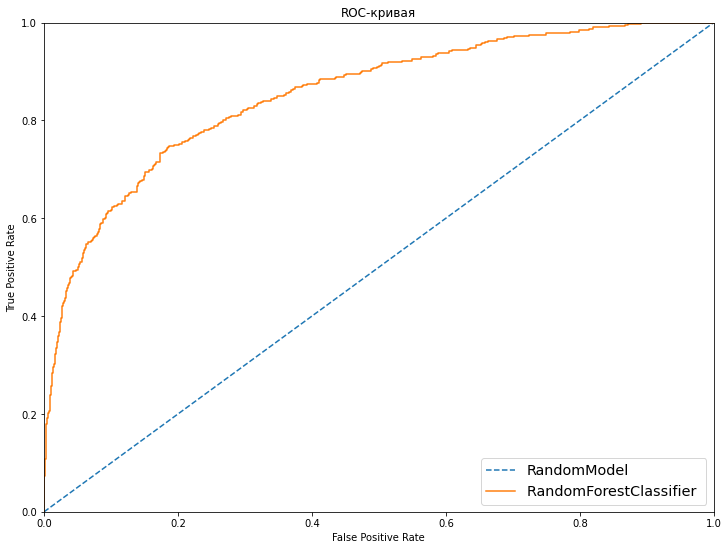

In [ ]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=99,max_depth = 14)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict_proba(features_test)
probabilities_one_test = predicted_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier ',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier ')
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

<div class="alert alert-info", style="border:solid dark-blue 3px; padding: 20px">
<font size="4", color = "Light-Blue"><b>🎯 Итог </b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
При работе с проектом было выполнено:

Были подготовлены и изучены данные. Разбиты данные на тренировочную, валидационную и тестовую выборку.
Исследована задача. Были применены модели Решающее дерево, случайный лес, логистическую регрессию
Скоректирован балланс класса. 
Была проверена модель на тестовой выборке с улучшенными параметрамию.Наилучший результат был показан моделью случайного леса.
        
Обученная модель случайного леса со взвешенными классами имеет достаточную адекватность, подтвержденная ее значением AUC-ROC =  0.8576.  
Точность попадания по классам 0.8555
        
Precision 0.6714975845410628
        
Recall 0.2103960396039604

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*